In [1]:
#importing the dataset: images of handwritten numbers

#importing the correct packages
import numpy as np
import matplotlib.pyplot as plt

import scipy.io 
abs_path = '/Users/assel2/Documents/ML_coursera/machine-learning-ex3/machine-learning-ex3/ex3/ex3data1.mat'
raw_data = scipy.io.loadmat(abs_path)


<class 'numpy.ndarray'> (1, 5000)


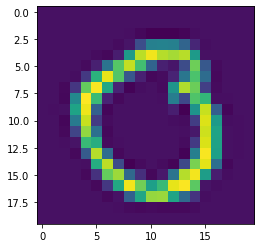

In [2]:
X = raw_data['X'] #accessing a dictionary 
Y = raw_data['y'].T
print(type(Y), Y.shape)

index = 100
demo_image = X[index]

demo_image = demo_image.reshape(20,20)
imgplot = plt.imshow(demo_image)

In [ ]:
#replacing zeros in y vector with 10
np.place(Y,Y==10,0)
train_set_x = X
train_set_y = Y
m_train = X.shape[0]
num_Features = X.shape[1]
num_Labls = 10

print ("Number of training examples: m_train = " + str(m_train))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))

In [3]:
#shuffle the training data set, take 20% for validation, 20% for test and 60% for training
#adjust the hyperparameters with the validation set
print(X.shape)
print(Y.shape)

rand_shuffle = np.random.permutation(5000)
np.take(X,rand_shuffle,axis=0,out=X)
np.take(Y,rand_shuffle,axis=1,out=Y)
X_train = X[0:3000,:]
Y_train = Y[:,0:3000]
X_valid = X[3000:4000,:]
Y_valid = Y[:,3000:4000]
X_test = X[4000:5000,:]
Y_test = Y[:,4000:5000]
print ("Number of training examples: X = " + str(X_train.shape))
print ("Number of training examples: Y = " + str(Y_train.shape))
print ("Number of validating examples: X = " + str(X_valid.shape))
print ("Number of validating examples: Y = " + str(Y_valid.shape))
print ("Number of test examples: X = " + str(X_test.shape))
print ("Number of test examples: Y = " + str(Y_test.shape))

print(Y_train[:,4])

(5000, 400)
(1, 5000)
Number of training examples: X = (3000, 400)
Number of training examples: Y = (1, 3000)
Number of validating examples: X = (1000, 400)
Number of validating examples: Y = (1, 1000)
Number of test examples: X = (1000, 400)
Number of test examples: Y = (1, 1000)
[10]


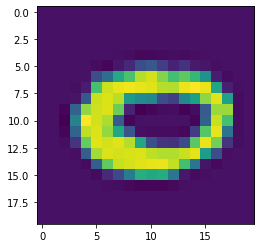

In [4]:
index = 4
demo_image = X_train[index]

demo_image = demo_image.reshape(20,20)
imgplot = plt.imshow(demo_image)

In [ ]:
#this is standardising the data set
train_set_x = X/255
print(train_set_x.shape)

In [5]:
#step by step check logic for matrix
input_layer_n = np.random.randn(400,5000) #this is a matrix with 400 features and 5000 training examples
W1 = np.random.randn(7,400) #these are my waights for the first hidden layer. there are 7 neurons (rows) and 400 columns since it is L-1 or number of features in X
b1 = np.zeros([7,1])
Z1 = np.dot(W1,input_layer_n)+b1
A1 = np.tanh(Z1)

W2 = np.random.randn(10,7) #since there are 10 classes then the output layer is 10 nodess
b2 = np.zeros([10,1])
Z2 = np.dot(W2.T,A1)+ b2
A2 = sigmoid(Z2)
print(A2)
#this is what I want to do and what kind of dimensions I am looking for

ValueError: shapes (7,10) and (7,5000) not aligned: 10 (dim 1) != 7 (dim 0)

In [6]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [7]:
def layer_sizes(X, Y):
    n_x_in = X.shape[1] # size of input layer
    n_hid = 7
    n_y_out = 10 # size of output layer
    return (n_x_in, n_hid, n_y_out)

In [8]:
(n_x, n_h, n_y) = layer_sizes(X_train,Y_train)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 400
The size of the hidden layer is: n_h = 7
The size of the output layer is: n_y = 10


In [9]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros([n_h,1])
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros([n_y,1])
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00419294  0.00535638  0.00507218 ...  0.00806333  0.00769611
  -0.0071764 ]
 [-0.00371894  0.00685595  0.02405774 ... -0.01148474 -0.02314751
  -0.00813946]
 [-0.00705835 -0.02314023  0.00161697 ...  0.00345224 -0.00916835
   0.00562171]
 ...
 [ 0.00826022  0.007941   -0.00338335 ... -0.00249701  0.00177274
  -0.00164061]
 [ 0.00574501  0.01424859 -0.00426309 ...  0.00740493  0.00623319
   0.0031466 ]
 [-0.00373321 -0.00106294  0.00583441 ...  0.00577612 -0.00124509
   0.00054159]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00037491  0.0061951  -0.0074819   0.01077584  0.00532821 -0.00019878
   0.0028315 ]
 [-0.02175431 -0.00988336 -0.00815306  0.0078343   0.00443631  0.00703503
  -0.01051425]
 [ 0.00579883 -0.00806108 -0.00951759 -0.01607754 -0.00321216  0.00973861
  -0.00704204]
 [ 0.00761965 -0.00716408 -0.00350593  0.0031444  -0.00098949 -0.0045349
   0.00184064]
 [ 0.00291454  0.00111923 -0.00866729  0.00997096  0.00189248  0.00917063
   0.01351324]
 [-0.0

In [11]:
X_train = X_train.T
X_train.shape

(400, 3000)

In [12]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = softmax(Z2)
    
    #assert(A2.shape == (10, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [17]:
#testing out the forward propogation function 
A2, cache = forward_propagation(X_train,parameters)
#print(A2)
#Y.shape[1]

In [18]:
def compute_cost(A2, Y, parameters):
    #you need to update this to make it compatable with softmax 
    
    m = Y.shape[1] # number of example
    #logprobs = np.multiply(np.log(A2),Y)+(1-Y)*(np.log(1-A2))
    #cost = -1/m*(np.sum(logprobs))
    logprobs = np.multiply(np.log(A2),Y)
    cost = -1*(np.sum(logprobs))
#     import pdb;pdb.set_trace()
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [19]:
cost = compute_cost(A2,Y_train,parameters)
print(cost)

382620.6950430216


In [28]:
print(X_train.shape[1])
Y_hot = np.zeros([X_train.shape[1],10])
print(Y_hot.shape)
print(Y_train.shape)
print(Y_train)
ind_Y_train = Y_train -1
Y_hot[np.arange(X_train.shape[1]), ind_Y_train] = 1
print(Y_hot)
Y_hot = Y_hot.T

3000
(3000, 10)
(1, 3000)
[[ 3 10  7 ...  4  8 10]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [29]:
def backward_propagation(parameters, cache, X, Y):
 
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
  
    A1 = cache['A1']
    A2 = cache['A2']
  
    dZ2 = A2 - Y
    dW2 = 1/m*(np.dot(dZ2,A1.T))
    db2 = 1/m*np.sum(dZ2,axis = 1, keepdims = True)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),(1-np.power(A1,2)))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis = 1, keepdims = True)

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [30]:
grads = backward_propagation(parameters,cache,X_train,Y_hot)
print(grads)

{'dW1': array([[ 0.00000000e+00,  0.00000000e+00, -5.90312249e-10, ...,
         1.32018812e-07, -1.34111055e-08,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.95838985e-09, ...,
         2.99191438e-08, -3.20472773e-09,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.47495591e-09, ...,
         5.02814944e-08, -4.44393982e-09,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -7.05659041e-10, ...,
        -1.26780902e-08,  1.34476900e-09,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.19583378e-10, ...,
        -4.29398293e-08,  4.51953659e-09,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.18166702e-09, ...,
         5.97095500e-08, -6.13805909e-09,  0.00000000e+00]]), 'db1': array([[ 2.09662422e-05],
       [ 2.12922038e-05],
       [-4.37487230e-05],
       [ 2.80592424e-05],
       [-1.83151251e-05],
       [ 9.97071481e-05],
       [ 2.24415659e-05]]), 'dW2': array([[-2.48240367e-03, -4.35821931

In [31]:
def update_parameters(parameters, grads, learning_rate = 1.2):
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - (learning_rate*(dW1))
    b1 = b1 - (learning_rate*(db1))
    W2 = W2 - (learning_rate*(dW2))
    b2 = b2 - (learning_rate*(db2))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [32]:
parameters = update_parameters(parameters,grads,learning_rate =1)
#print(parameters)

In [ ]:
Y_trial = np.random.randn(1,5000)

Y_trial = [0 if i <=0.5 else 1 for i in Y_trial]
Y_trial = np.array(Y_trial)
Y_trial = Y_trial.reshape(-1,1)
print(Y_trial.shape)

In [33]:
def nn_model(X, Y, n_h, num_iterations, print_cost=False):

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate = 1.2 )
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [34]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [36]:
parameters = nn_model(X_train, Y_hot, 7, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 6907.861216
Cost after iteration 100: 1203.013447
Cost after iteration 200: 734.901766
Cost after iteration 300: 592.065652
Cost after iteration 400: 497.693881
Cost after iteration 500: 477.779662
Cost after iteration 600: 396.098793
Cost after iteration 700: 350.312302
Cost after iteration 800: 314.546414
Cost after iteration 900: 303.396467
Cost after iteration 1000: 277.146383
Cost after iteration 1100: 259.949997
Cost after iteration 1200: 245.304883
Cost after iteration 1300: 232.591145
Cost after iteration 1400: 244.034036
Cost after iteration 1500: 224.790374
Cost after iteration 1600: 210.777559
Cost after iteration 1700: 201.484017
Cost after iteration 1800: 193.739505
Cost after iteration 1900: 186.917101
Cost after iteration 2000: 180.780372
Cost after iteration 2100: 175.485237
Cost after iteration 2200: 170.802804
Cost after iteration 2300: 166.590326
Cost after iteration 2400: 162.752967
Cost after iteration 2500: 159.216549
Cost after iteration 2

In [ ]:
#https://utkuufuk.com/2018/06/03/one-vs-all-classification/

In [ ]:
def testing(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = softmax(Z2)
    
    #assert(A2.shape == (10, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [42]:
X_test = X_test.T

(10, 1000)


In [43]:
A2_test, cache_test = forward_propagation(X_test,parameters)

Y_hot_test = np.zeros([X_test.shape[1],10])
ind_Y_test = Y_test -1
Y_hot_test[np.arange(X_test.shape[1]), ind_Y_test] = 1
print(Y_hot_test)
Y_hot_test = Y_hot_test.T

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [66]:
print ('Accuracy: %d' % float((np.dot(Y_hot_test[1],A2_test[1].T) + np.dot(1-Y_hot_test[1],1-A2_test[1].T))/float(Y_hot_test.size)*100) + '%')
print ('Accuracy: %d' % float((np.dot(Y_hot_test[2],A2_test[2].T) + np.dot(1-Y_hot_test[2],1-A2_test[2].T))/float(Y_hot_test.size)*100) + '%')

Accuracy: 9%
Accuracy: 9%


In [50]:
all_nonzeros = np.nonzero(testing).T

AttributeError: 'tuple' object has no attribute 'T'

In [51]:
print(all_nonzeros)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3

In [55]:
testing_Y = np.nonzero(Y_hot_test)
testing_Y

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [59]:
(all_nonzeros[1]==testing_Y[1]).all()

True

In [58]:
testing_Y[1]

array([ 13,  18,  40,  42,  59,  64,  73,  84, 118, 133, 152, 157, 162,
       164, 166, 170, 176, 194, 203, 205, 211, 216, 239, 252, 254, 266,
       285, 290, 310, 333, 352, 360, 362, 367, 380, 403, 416, 419, 428,
       442, 443, 450, 462, 463, 485, 493, 502, 503, 515, 517, 518, 528,
       538, 544, 551, 555, 556, 558, 589, 605, 612, 650, 653, 657, 662,
       672, 681, 695, 720, 758, 762, 766, 771, 777, 785, 799, 806, 808,
       816, 819, 828, 831, 842, 852, 861, 863, 866, 868, 881, 895, 918,
       954, 976, 991, 995,   6,  15,  19,  22,  25,  39,  68,  71,  72,
        93,  96, 115, 121, 130, 142, 144, 153, 163, 173, 184, 189, 192,
       206, 230, 233, 251, 264, 278, 288, 289, 296, 297, 304, 320, 325,
       331, 334, 373, 383, 385, 388, 391, 396, 404, 406, 407, 418, 424,
       441, 446, 448, 449, 460, 465, 467, 470, 476, 478, 481, 484, 488,
       550, 563, 566, 567, 588, 596, 604, 613, 618, 631, 645, 656, 664,
       674, 699, 704, 705, 711, 714, 743, 765, 772, 780, 798, 81